In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
train = pd.read_csv('titanic_train.csv')

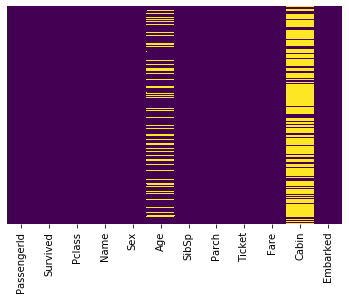

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [16]:
train.dropna(inplace=True)

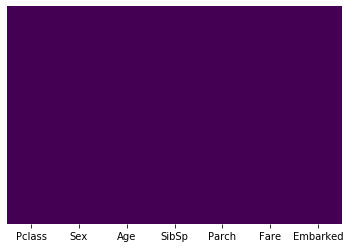

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
y = train['Survived'] #select the column representing survival 
X = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], 1, inplace=True) # drop the irrelevant columns and keep the rest
X = pd.get_dummies(train) # convert non-numerical variables to dummy variables

In [18]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
test = pd.read_csv("titanic_test.csv") # load the testing data
ids = test[['PassengerId']] # create a sub-dataset for submission file and saving it
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1, inplace=True) # drop the irrelevant and keeping the rest
test.fillna(2, inplace=True) # fill (instead of drop) empty rows so that I would get the exact row number required for submission
test = pd.get_dummies(test) # convert non-numerical variables to dummy variables

In [21]:
predictions = dtc.predict(test)

In [22]:
results = ids.assign(Survived = predictions) # assign predictions to ids
results.to_csv("titanic-results.csv", index=False) # write the final dataset to a csv file.